# Implementing Neural Network on MNIST data using TensorFlow

In [1]:
# importing tensor flow
import tensorflow as tf

In [3]:
# importing mnist data from tensor flow
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
# how data look likes 
mnist.train.images,mnist.train.labels

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]]))

# How an image looks like 

In [5]:
import numpy as np
from matplotlib import pyplot as plt

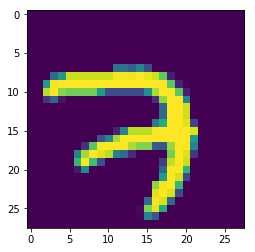

In [6]:
# checking one of the image by reshaping it from 784 pixel to a 28*28 pixel image
first=mnist.train.images[0]
first=first.reshape((28,28))
plt.imshow(first)

In [7]:
# initializing weigts and bias for the network
# taking 256 units in both hidden1 and hidden2 layer and 10 units in output layer 
n_input=784
n_hidden1=256
n_hidden2=256
n_output=10
weight={
    'h1': tf.Variable(tf.random_normal([n_input,n_hidden1])),
    'h2':tf.Variable(tf.random_normal([n_hidden1,n_hidden2])),
    'out':tf.Variable(tf.random_normal([n_hidden2,n_output]))
}
bias={
     'h1': tf.Variable(tf.random_normal([n_hidden1])),
    'h2':tf.Variable(tf.random_normal([n_hidden2])),
    'out':tf.Variable(tf.random_normal([n_output]))
}

In [8]:
# forward propogation function
# takes 3 argument [ x = input data of size n*784 where n is number of images , weight , bias]
# return output of shape n*10 
def forward_propogation(x , weight , bias):
    
    input_first_hidden = tf.add( tf.matmul(x , weight['h1']),bias['h1'])
    outputof_first_hidden = tf.nn.relu(input_first_hidden)
    
    input_second_hidden = tf.add( tf.matmul(outputof_first_hidden , weight['h2'] ),bias['h2'])
    outputof_second_hidden = tf.nn.relu(input_second_hidden)
    
    final_output = tf.add( tf.matmul(outputof_second_hidden, weight['out']), bias['out'])
    return final_output

In [9]:
# input_ is placeholder for input data of shape n*784 where n is number of images 
# size of n can be decided at run time as it is different for training data and testing data
# true_output is placeholder for actual output corrosponds to input_ data , its shape is n*10 
# where n is number of images input
# predicted_output is the output of network 
 
input_ = tf.placeholder("float",[None,784])
true_output = tf.placeholder(tf.int32,[None,10])
predicted_output = forward_propogation( input_ , weight , bias)



In [18]:
# using inbuilt cost function of tensor flow 
# taking mean of cost for better undersatnding
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=predicted_output ,labels =true_output ))


In [19]:
# using inbuilt optimizer for back propogation 
# using learning rate of 0.01
optimizer=tf.train.AdamOptimizer(learning_rate=0.01)
optimize=optimizer.minimize(cost)



In [20]:
# creating session
# initializing varaibles
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [21]:
# running the optimizer for number of times so that network gets better train
# as cost depends on predicted_output ( which in turn depend on input_ ) and true_output
# it is neccesary to provide input_ and true_output during run
for i in range(50):
    cur_cost,_= sess.run([cost,optimize], feed_dict={input_ : mnist.train.images , true_output : mnist.train.labels})
    print(cur_cost)

2549.2124
1423.6493
1169.0378
1062.1869
896.26294
741.13556
642.6586
532.86255
416.50348
321.95053
250.68222
198.70699
168.53387
160.34851
165.99974
173.03168
171.61789
159.50366
141.4951
124.10392
111.06995
102.40938
96.97776
93.48932
90.9689
88.9557
86.848854
84.2534
81.033455
77.419685
73.85357
70.67446
67.93321
65.61331
63.45066
61.404255
59.452515
57.617855
55.9364
54.39458
53.00181
51.644817
50.31241
49.018253
47.823326
46.749416
45.772
44.829197
43.85797
42.81678


In [22]:
#finding the accuracy by comparing on testing data
predicted_label = tf.argmax( predicted_output,1)
true_label = tf.argmax( true_output ,1)
correct_pred = tf.equal( predicted_label , true_label )
pred , true , correct = sess.run([ predicted_label , true_label , correct_pred ], 
                                 feed_dict={ input_:mnist.test.images , true_output : mnist.test.labels })
correct.sum()

8910

Gets an Accuracy of neraly 89% on mnist data using covolutional neural network 

In [24]:
# again creating session
# again initializing varaibles for better comparsion
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [25]:
# again running the optimizer for number of times so that network gets better train
# taking batch size of 100
# number of batches equal to n/batch size
# cost of one run equal to sum of cost due to each batch
batch_size=100
for i in range(20):
    total_batches = int(mnist.train.num_examples/batch_size)
    total_cost=0
    for j in range(total_batches):
            batch_x ,batch_y = mnist.train.next_batch(batch_size)
            cur_cost,_= sess.run([cost,optimize], feed_dict={input_ : batch_x , true_output :batch_y })
            total_cost+=cur_cost
    print(total_cost)

25781.377021551132
4877.668698579617
2753.1169444911043
1825.081745321756
1614.3661358693967
1330.566154648521
1174.615960496594
1062.7053401165322
996.603897047313
848.6206973731443
731.7193289295018
622.7096800606218
636.212024634063
541.6543423137944
469.9296332967614
468.3468236002309
450.8600732719657
338.16311857667773
346.22500121690814
312.5768464898603


In [27]:
#finding the accuracy by comparing on testing data
predicted_label = tf.argmax( predicted_output,1)
true_label = tf.argmax( true_output ,1)
correct_pred = tf.equal( predicted_label , true_label )
pred , true , correct = sess.run([ predicted_label , true_label , correct_pred ], 
                                 feed_dict={ input_:mnist.test.images , true_output : mnist.test.labels })
correct.sum()

9631

Gets an final accuracy of 96% which is much better than the previous one  